<a href="https://colab.research.google.com/github/tanumeena28/ML-Assignment/blob/main/ML_LAB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

def simulate_dice_rolls():
    """
    Simulates rolling dice, calculates sums, plots histograms, and finds mean/variance.
    """
    # List of how many times to repeat the experiment for each number of dice
    num_experiments_list = [100, 500, 1000, 5000, 10000, 50000, 100000] # [cite: 2]

    # Range of dice to roll, from 2 to 50
    # The prompt excludes rolling the die once [cite: 1]
    num_dice_range = range(2, 51)

    # Create a directory to save the plots
    output_dir = 'dice_histograms'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for num_dice in num_dice_range:
        # Create a subdirectory for the current number of dice
        dice_subdir = os.path.join(output_dir, f'{num_dice}_dice')
        if not os.path.exists(dice_subdir):
            os.makedirs(dice_subdir)

        print(f"--- Simulating for {num_dice} Dice ---")

        for num_experiments in num_experiments_list:
            # Simulate rolling 'num_dice' dice 'num_experiments' times
            # Each die roll is an integer from 1 to 6
            rolls = np.random.randint(1, 7, size=(num_experiments, num_dice))

            # Calculate the sum of the dice for each experiment
            sums = np.sum(rolls, axis=1)

            # --- Calculate Mean and Variance ---
            mean_of_sums = np.mean(sums)
            variance_of_sums = np.var(sums)

            print(f"  Experiments: {num_experiments}")
            print(f"    Mean: {mean_of_sums:.2f}")
            print(f"    Variance: {variance_of_sums:.2f}\n")

            # --- Plot and Save Histogram ---
            plt.figure(figsize=(10, 6))
            plt.hist(sums, bins='auto', density=True, edgecolor='black', alpha=0.7)
            plt.title(f'Distribution of Sums for {num_dice} Dice ({num_experiments} trials)')
            plt.xlabel('Sum of Dice')
            plt.ylabel('Probability Density')
            plt.grid(True, linestyle='--', alpha=0.6)

            # Save the plot [cite: 3]
            filename = os.path.join(dice_subdir, f'hist_{num_experiments}_trials.png')
            plt.savefig(filename)
            plt.close()

# Run the simulation
simulate_dice_rolls()
print("Simulation complete. Histograms are saved in the 'dice_histograms' directory.")

--- Simulating for 2 Dice ---
  Experiments: 100
    Mean: 6.99
    Variance: 7.01

  Experiments: 500
    Mean: 7.01
    Variance: 6.06

  Experiments: 1000
    Mean: 7.04
    Variance: 5.64

  Experiments: 5000
    Mean: 6.97
    Variance: 5.81

  Experiments: 10000
    Mean: 7.04
    Variance: 5.86

  Experiments: 50000
    Mean: 7.01
    Variance: 5.86

  Experiments: 100000
    Mean: 7.00
    Variance: 5.81

--- Simulating for 3 Dice ---
  Experiments: 100
    Mean: 9.97
    Variance: 8.77

  Experiments: 500
    Mean: 10.38
    Variance: 8.82

  Experiments: 1000
    Mean: 10.56
    Variance: 8.47

  Experiments: 5000
    Mean: 10.52
    Variance: 9.18

  Experiments: 10000
    Mean: 10.48
    Variance: 8.78

  Experiments: 50000
    Mean: 10.49
    Variance: 8.63

  Experiments: 100000
    Mean: 10.49
    Variance: 8.76

--- Simulating for 4 Dice ---
  Experiments: 100
    Mean: 12.99
    Variance: 11.07

  Experiments: 500
    Mean: 14.24
    Variance: 11.32

  Experiments: 100

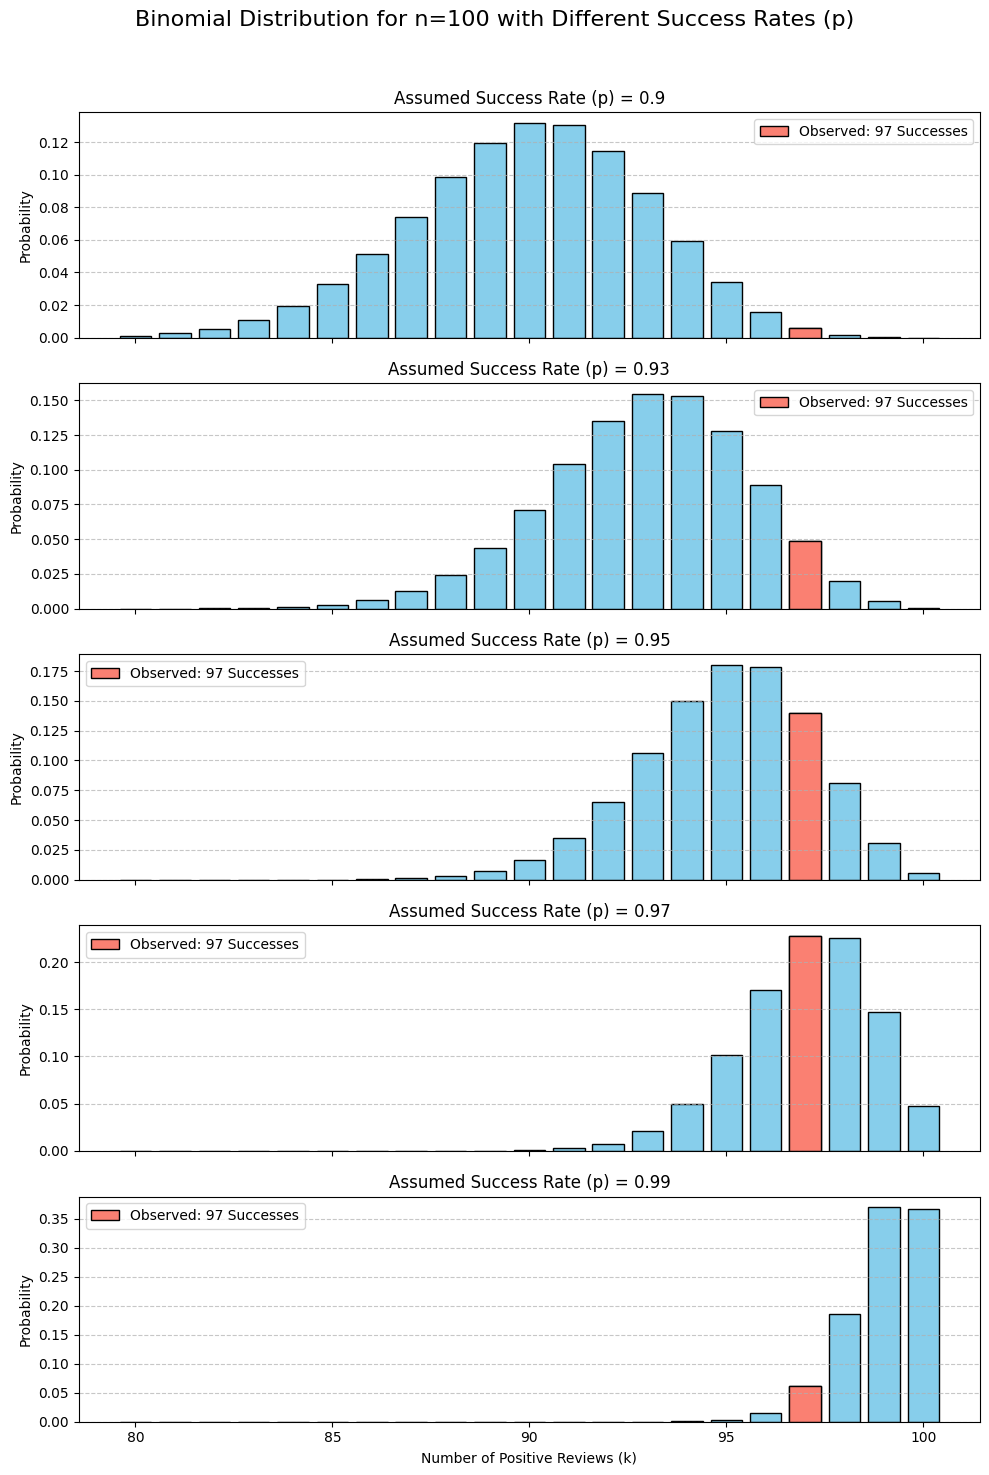

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

def estimate_success_rate():
    """
    Constructs binomial distributions with different success rates to estimate
    the true rate for a product with 97/100 positive reviews.
    """
    n = 100  # Total number of reviews (trials)
    k = 97   # Number of positive reviews (successes)

    # A range of possible success rates (p) to test, centered around the observed rate (0.97)
    possible_p = [0.90, 0.93, 0.95, 0.97, 0.99]

    # Set up the plot with multiple subplots
    fig, axes = plt.subplots(len(possible_p), 1, figsize=(10, 15), sharex=True)
    fig.suptitle('Binomial Distribution for n=100 with Different Success Rates (p)', fontsize=16)

    # Define the range of outcomes (number of successes) to display on the x-axis
    x = np.arange(80, 101)

    for i, p in enumerate(possible_p):
        # Create a binomial distribution for the given n and p
        dist = binom(n, p)

        # Calculate the probability mass function (PMF) for each outcome in x
        pmf = dist.pmf(x)

        # Plot the PMF as a bar chart (histogram)
        ax = axes[i]
        ax.bar(x, pmf, color='skyblue', edgecolor='black')
        ax.set_title(f'Assumed Success Rate (p) = {p}')
        ax.set_ylabel('Probability')

        # Highlight the bar corresponding to our observed outcome of 97 successes
        observed_prob = dist.pmf(k)
        ax.bar(k, observed_prob, color='salmon', edgecolor='black', label=f'Observed: {k} Successes')
        ax.legend()
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    axes[-1].set_xlabel('Number of Positive Reviews (k)')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Run the analysis
estimate_success_rate()

In [5]:
import pandas as pd
import numpy as np

def calculate_entropy(column: pd.Series) -> float:
    """
    Calculates the entropy of a pandas Series (a column from a DataFrame).
    It handles both categorical and continuous data.
    """
    # Drop missing values for a clean calculation
    column = column.dropna()
    if column.empty:
        return 0.0

    # --- Binning for Continuous Data ---
    # The hint suggests binning continuous values.
    # We check if the column is numeric and has enough unique values to warrant binning.
    if pd.api.types.is_numeric_dtype(column) and column.nunique() > 10:
        # pd.cut divides the range of data into 10 discrete intervals (bins).
        binned_column = pd.cut(column, bins=10, labels=False, include_lowest=True)
        counts = binned_column.value_counts()
    else:
        # --- Direct Calculation for Categorical Data ---
        # For categorical data or numeric data with few unique values,
        # we count the occurrences of each unique value directly.
        counts = column.value_counts()

    # Calculate the probability of each unique value or bin
    probabilities = counts / len(column)

    # Filter out probabilities of 0 to avoid errors in the log calculation
    probabilities = probabilities[probabilities > 0]

    # --- Entropy Formula ---
    # H(X) = -Σ [p(xi) * log2(p(xi))]
    entropy = -np.sum(probabilities * np.log2(probabilities))

    return entropy

# --- Load the 3 User-Provided Datasets ---
try:
    # Make sure these CSV files are in the same directory as your script
    faa_dataset = pd.read_csv('faa_ai_prelim.csv')
    advertising_dataset = pd.read_csv('advertising.csv')
    housing_dataset = pd.read_csv('Housing.csv')

    datasets = {
        "FAA AI Preliminary Dataset": faa_dataset,
        "Advertising Dataset": advertising_dataset,
        "Housing Dataset": housing_dataset
    }

    # --- Calculate and Print Entropy for Each Dataset ---
    for name, df in datasets.items():
        print(f"--- Entropy for {name} ---")
        for column_name in df.columns:
            entropy_value = calculate_entropy(df[column_name])
            print(f"  Column '{column_name}': {entropy_value:.4f}")
        print("\n")

except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure the CSV files are in the correct directory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

--- Entropy for FAA AI Preliminary Dataset ---
  Column 'UPDATED': 0.2243
  Column 'ENTRY_DATE': 2.7897
  Column 'EVENT_LCL_DATE': 3.8502
  Column 'EVENT_LCL_TIME': 6.1973
  Column 'LOC_CITY_NAME': 6.2787
  Column 'LOC_STATE_NAME': 4.3330
  Column 'LOC_CNTRY_NAME': -0.0000
  Column 'RMK_TEXT': 6.3268
  Column 'EVENT_TYPE_DESC': 0.9101
  Column 'FSDO_DESC': 5.2054
  Column 'REGIST_NBR': 6.3750
  Column 'FLT_NBR': 2.5850
  Column 'ACFT_OPRTR': 2.5216
  Column 'ACFT_MAKE_NAME': 3.8938
  Column 'ACFT_MODEL_NAME': 5.5629
  Column 'ACFT_MISSING_FLAG': 0.0000
  Column 'ACFT_DMG_DESC': 1.8199
  Column 'FLT_ACTIVITY': 2.0382
  Column 'FLT_PHASE': 1.8600
  Column 'FAR_PART': -0.0000
  Column 'MAX_INJ_LVL': 1.8474
  Column 'FATAL_FLAG': -0.0000
  Column 'FLT_CRW_INJ_NONE': 0.6985
  Column 'FLT_CRW_INJ_MINOR': 0.9183
  Column 'FLT_CRW_INJ_SERIOUS': -0.0000
  Column 'FLT_CRW_INJ_FATAL': 1.0000
  Column 'FLT_CRW_INJ_UNK': 0.0000
  Column 'CBN_CRW_INJ_NONE': 0.0000
  Column 'CBN_CRW_INJ_MINOR': 0.000